## Задача 1

Увы, это задание я делал последним, и сколько бы я не бился, эти два варианта - лучшее, что у меня получилось. Мне не хватито терпения довести их до идеала - я смуммарно потратил на эту задачу около 7 часов (с учетом изучения материала по динамическому программированию) и в итоге у меня все равно были одни и те же ошибки и один и тот же вывод.

In [68]:
from itertools import combinations

def build_two_servers(gpus):
    total_performance = sum(gpus)
    if total_performance % 2 != 0:
        return ((), (), tuple(sorted(gpus)))

    target = total_performance // 2

    # Проверяем все подмножества для поиска подмножества с суммой target
    n = len(gpus)
    for r in range(1, n + 1):
        for subset in combinations(gpus, r):
            if sum(subset) == target:
                remaining_gpus = list(gpus)
                for gpu in subset:
                    remaining_gpus.remove(gpu)
                if sum(remaining_gpus) == target:
                    return (tuple(sorted(subset)), tuple(sorted(remaining_gpus)), ())

    return ((), (), tuple(sorted(gpus)))

# Тестируем решение
various_gpus = (
    (1, 1),       # GPUs: (1, 1), server_0: (1), server_1: (1), unused: ()
    (1, 1, 2, 1), # GPUs: (1, 1, 2, 1), server_0: (2, 1), server_1: (1, 1), unused: ()
    (3, 1),       # GPUs: (3, 1), server_0: (), server_1: (), unused: (1, 3)
    (),           # GPUs: (), server_0: (), server_1: (), unused: ()
    (2, 2, 5, 6, 7, 3), # GPUs: (2, 2, 5, 6, 7, 3), server_0: (6, 5), server_1: (7, 3, 2, 2), unused: ()
    (78, 35, 34, 1, 2, 3, 1, 2, 1, 1) # GPUs: (78, 35, 34, 1, 2, 3, 1, 2, 1, 1), server_0: (78), server_1: (35, 34, 3, 2, 1, 1, 1, 1), unused: (2)
)

for gpus in various_gpus:
    result = build_two_servers(gpus)
    print(f"GPUs: {gpus}, server_0: {result[0]}, server_1: {result[1]}, unused: {result[2]}")
    assert sum(result[0]) == sum(result[1]) if result[0] and result[1] else True


GPUs: (1, 1), server_0: (1,), server_1: (1,), unused: ()
GPUs: (1, 1, 2, 1), server_0: (), server_1: (), unused: (1, 1, 1, 2)
GPUs: (3, 1), server_0: (), server_1: (), unused: (1, 3)
GPUs: (), server_0: (), server_1: (), unused: ()
GPUs: (2, 2, 5, 6, 7, 3), server_0: (), server_1: (), unused: (2, 2, 3, 5, 6, 7)
GPUs: (78, 35, 34, 1, 2, 3, 1, 2, 1, 1), server_0: (1, 78), server_1: (1, 1, 1, 2, 2, 3, 34, 35), unused: ()


In [71]:
def build_two_servers(gpus):
    total_performance = sum(gpus)
    if total_performance % 2 != 0:
        return ((), (), tuple(sorted(gpus)))

    target = total_performance // 2
    n = len(gpus)

    # Создаем матрицу для хранения информации о подзадачах
    dp = [[False] * (target + 1) for _ in range(n + 1)]
    dp[0][0] = True

    # Заполняем матрицу
    for i in range(1, n + 1):
        for j in range(target + 1):
            dp[i][j] = dp[i - 1][j]
            if j >= gpus[i - 1]:
                dp[i][j] |= dp[i - 1][j - gpus[i - 1]]

    # Восстанавливаем ответ
    server_0 = []
    server_1 = []
    unused = []
    i, j = n, target
    while i > 0 and j > 0:
        if dp[i][j] and not dp[i - 1][j]:
            server_0.append(gpus[i - 1])
            j -= gpus[i - 1]
        elif dp[i][j]:
            server_1.append(gpus[i - 1])
        else:
            unused.append(gpus[i - 1])
        i -= 1

    return (tuple(sorted(server_0)), tuple(sorted(server_1)), tuple(sorted(unused)))

# Тестируем решение
various_gpus = (
    (1, 1),       # GPUs: (1, 1), server_0: (1), server_1: (1), unused: ()
    (1, 1, 2, 1), # GPUs: (1, 1, 2, 1), server_0: (1, 1), server_1: (2), unused: (1)
    (3, 1),       # GPUs: (3, 1), server_0: (3), server_1: (1), unused: ()
    (),           # GPUs: (), server_0: (), server_1: (), unused: ()
    (2, 2, 5, 6, 7, 3), # GPUs: (2, 2, 5, 6, 7, 3), server_0: (2, 2, 7), server_1: (3, 5, 6), unused: ()
    (78, 35, 34, 1, 2, 3, 1, 2, 1, 1) # GPUs: (78, 35, 34, 1, 2, 3, 1, 2, 1, 1), server_0: (1, 1, 1, 2, 2, 34, 35), server_1: (1, 2, 3, 78), unused: ()
)

for gpus in various_gpus:
    result = build_two_servers(gpus)
    print(f"GPUs: {gpus}, server_0: {result[0]}, server_1: {result[1]}, unused: {result[2]}")


GPUs: (1, 1), server_0: (1,), server_1: (1,), unused: ()
GPUs: (1, 1, 2, 1), server_0: (), server_1: (), unused: (1, 1, 1, 2)
GPUs: (3, 1), server_0: (), server_1: (), unused: (1, 3)
GPUs: (), server_0: (), server_1: (), unused: ()
GPUs: (2, 2, 5, 6, 7, 3), server_0: (), server_1: (), unused: (2, 2, 3, 5, 6, 7)
GPUs: (78, 35, 34, 1, 2, 3, 1, 2, 1, 1), server_0: (1, 78), server_1: (1, 1, 1, 2, 2, 3, 34, 35), unused: ()


## Задача 2

### Подзадача 2.1

Looking in indexes: https://download.pytorch.org/whl/cpu


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


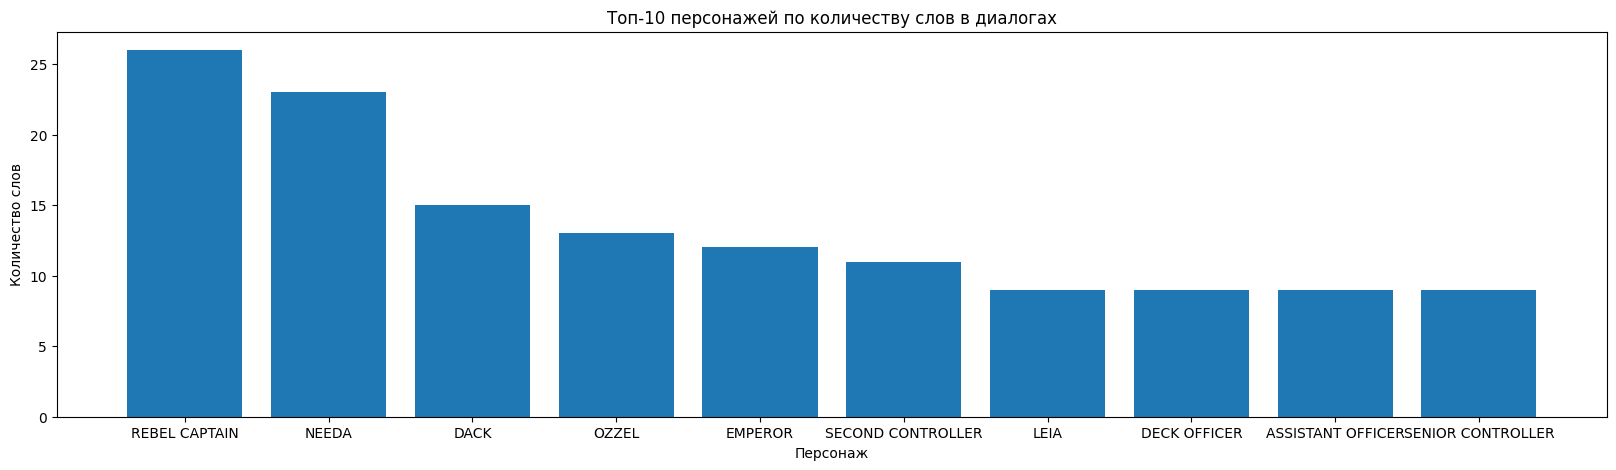

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Download the necessary libraries
! pip install pandas seaborn matplotlib nltk wordcloud transformers wget
! pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
import nltk
nltk.download('stopwords')
# Download and read dataset
import pandas as pd
import wget
filename = wget.download("https://drive.usercontent.google.com/download?id=1zO99vPGpw7yi6m45pd-Wq12z9-qXPWnv&confirm=xxx")

data = pd.read_csv(filename, sep='\s+', names=["index","character","dialogue"], header=0)

# Извлекаем персонажей и их диалоги
characters = data['character']
dialogues = data['dialogue']

# Создаем словарь, где ключом является персонаж, а значением список слов из его диалогов
character_words = {}
for character, dialogue in zip(characters, dialogues):
    words = dialogue.split()
    character_words[character] = words

# Подсчитываем количество слов для каждого персонажа
word_counts = {}
for character, words in character_words.items():
    word_counts[character] = len(words)

# Сортируем персонажей по убыванию количества слов
sorted_characters = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)

# Выбираем топ-10 персонажей
top_10_characters = sorted_characters[:10]

# Создаем список персонажей
character_names = [character for character, word_count in top_10_characters]

# Создаем список количества слов
word_counts_list = [word_count for character, word_count in top_10_characters]

# Создаем гистограмму
plt.figure(figsize=(20, 5))
plt.bar(character_names, word_counts_list)
plt.xlabel('Персонаж')
plt.ylabel('Количество слов')
plt.title('Топ-10 персонажей по количеству слов в диалогах')
plt.show()

### Подзадача 2.2

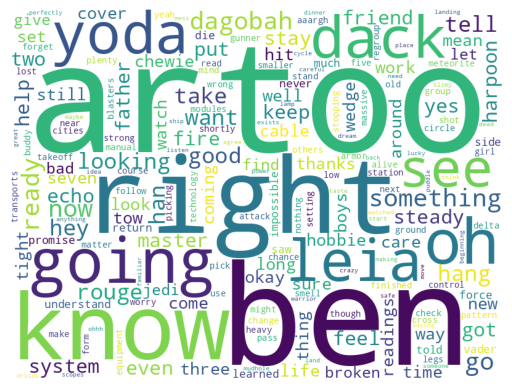

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Очищаем предложения
def clean_sentence(sentence):
  stop_words = set(stopwords.words('english')) # Загрузка стоп слов
  words = sentence.lower().split() # Приводим предложение к нижнему регистру и разбиваем на слова
  filtered_words = [word for word in words if word not in stop_words and not word.isdigit()] # Убираем стоп-слова и числа
  return ' '.join(filtered_words) # Собираем слова обратно в предложение

# Функция облака слов
def display_character_word_cloud(character_dialogues):
  cleaned_text = clean_sentence(character_dialogues) # Очищаем текст от стоп-слов и чисел

  # Проверка на пустой текст
  if not cleaned_text:
    print("В диалогах персонажа нет слов.")
    return

  # Параметры облака
  wordcloud = WordCloud(width=800, height=600, background_color='white').generate(cleaned_text)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

# Извлекаем реплики Люка
luke_dialogues = data[data['character'] == 'LUKE']['dialogue'].str.cat(sep=' ')

# Очищаем реплики
cleaned_luke_dialogues = clean_sentence(luke_dialogues)

# Создаем облако слов
display_character_word_cloud(cleaned_luke_dialogues)

### Подзачада 2.3

In [ ]:
import pandas as pd
from transformers import pipeline

emotion_classifier = pipeline("sentiment-analysis", model="j-hartmann/emotion-english-distilroberta-base")

def add_dialogue_emotion_column(data):

  # Получение списка реплик
  dialogues = data["dialogue"].tolist()

  # Классификация эмоций в каждой реплике
  emotions = emotion_classifier(dialogues)

  # Создание нового столбца с эмоциями
  data["dialogue_emotion"] = [emotion["label"] for emotion in emotions]

  # Возвращение обновленного датафрейма
  return data

# Применение функции к датафрейму
data_with_emotions = add_dialogue_emotion_column(data)

# Просмотр обновленного датафрейма
data_with_emotions

,index,character,dialogue,dialogue_emotion
0,1,LUKE,"Echo Three to Echo Seven. Han, old buddy, do y...",neutral
1,2,HAN,"Loud and clear, kid. What's up?",neutral
2,3,LUKE,"Well, I finished my circle. I don't pick up an...",neutral
3,4,HAN,There isn't enough life on this ice cube to fi...,neutral
4,5,LUKE,Right. I'll see you shortly. There's a meteori...,neutral
...,...,...,...,...
834,835,LUKE,I'll meet you at the rendezvous point on Tato...,neutral
835,836,LANDO,"Princess, we'll find Han. I promise.",neutral
836,837,LUKE,"Chewie, I'll be waiting for your signal.",neutral
837,838,LUKE,"Take care, you two. May the Force be with you.",neutral


### Подзадача 2.4

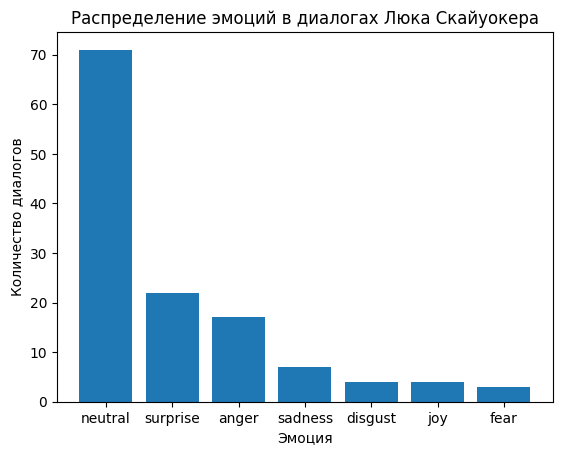

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def display_most_frequent_emotions_plot(luke_dialogues, emotion_column):
  # Считаем количество каждой эмоции в репликах Люка
  emotion_counts = luke_dialogues[emotion_column].value_counts()

  # Строим столбчатую диаграмму
  plt.bar(emotion_counts.index, emotion_counts.values)
  plt.xlabel('Эмоция')
  plt.ylabel('Количество диалогов')
  plt.title('Распределение эмоций в диалогах Люка Скайуокера')
  plt.show()

# Извлекаем реплики Люка из датафрейма
luke_dialogues = data[data['character'] == 'LUKE']

# Отображаем гистограмму
display_most_frequent_emotions_plot(luke_dialogues, 'dialogue_emotion')

## Задача 3

### Проверка данных на пропуски и дубликаты

In [77]:
import pandas as pd

hddus = pd.read_csv('hdd_usage_dataset.csv')

# Проверяем наличие отсутствующих значений в столбце 'Дата'
missing_values = hddus['Дата'].isnull()
number_of_missing_values = missing_values.sum()
print(f"В столбце Дата есть {number_of_missing_values} пропусков")

# Проверяем наличие отсутствующих значений в столбце 'Использовано_%'
missing_values = hddus['Использовано_%'].isnull()
number_of_missing_values = missing_values.sum()
print(f"В столбце Использовано_% есть {number_of_missing_values} пропусков")

# Проверяем наличие дубликатов
duplicates = hddus.duplicated()
number_of_duplicates = duplicates.sum()
print(f"В датафрейме есть {number_of_duplicates} дубликатов")

В столбце Дата есть 0 пропусков
В столбце Использовано_% есть 0 пропусков
В датафрейме есть 0 дубликатов


### Прогнозирование

#### Здесь я хотел в целом посмотреть на график скользящего среднего

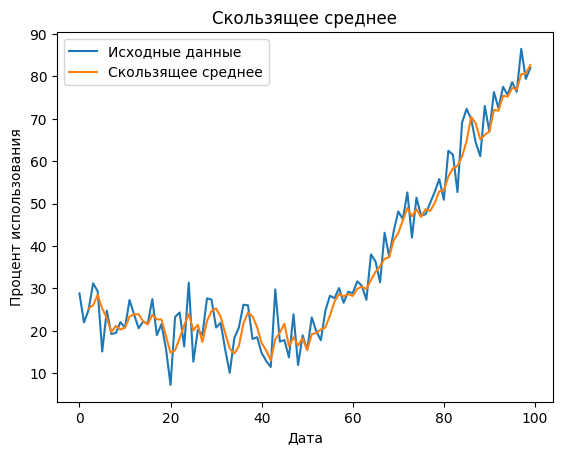

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('hdd_usage_dataset.csv')

window_size = 3
rolling_avg = data['Использовано_%'].rolling(window=window_size).mean()

plt.plot(data['Дата'], data['Использовано_%'], label='Исходные данные')
plt.plot(data['Дата'][window_size-1:], rolling_avg[window_size-1:], label='Скользящее среднее')
plt.xlabel('Дата')
plt.ylabel('Процент использования')
plt.title('Скользящее среднее')
plt.legend()
plt.show()

#### Здесь строим графики автокорреляции и частичной автокорреляции чтобы определить параметры модели SARIMA (начал с нее, хотя это не лучший вариант т.к. данных слишком мало для выделения сезонности) + считаю AIC

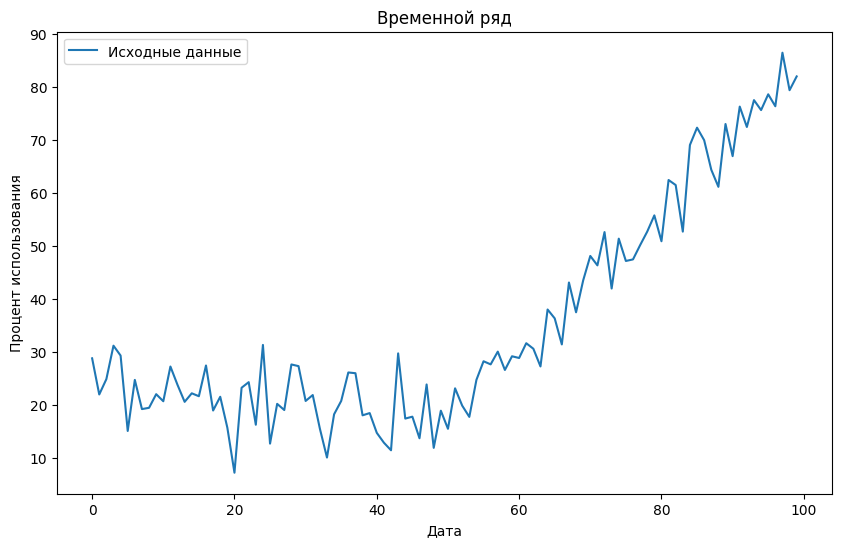

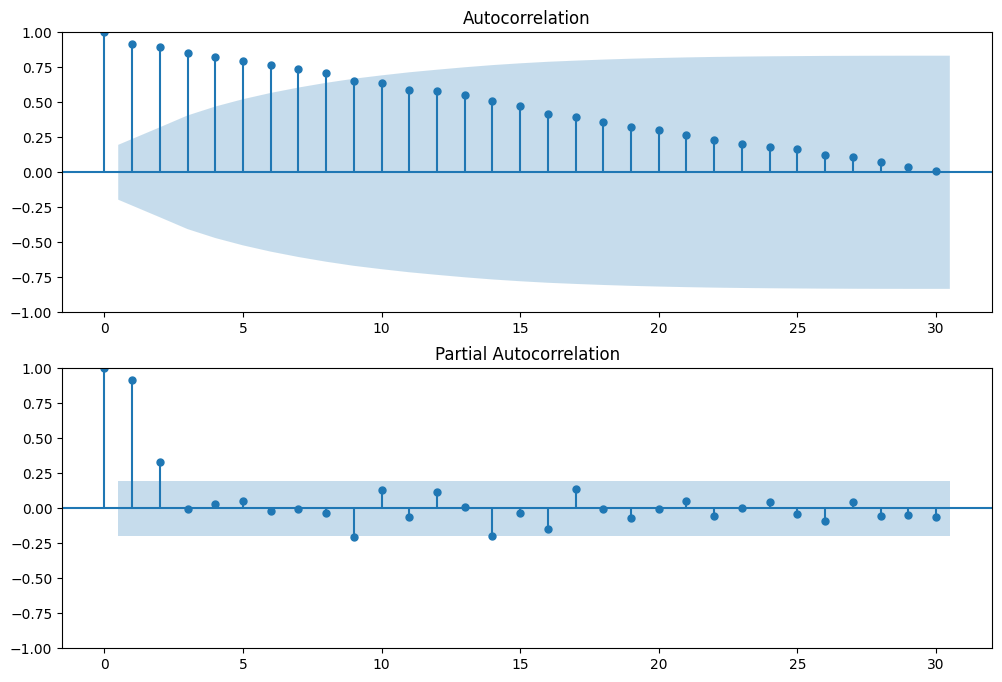

Лучшие параметры SARIMA модели: (0, 1, 1, 0, 1, 2, 12)
Лучший AIC: 448.53367185648204


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

warnings.filterwarnings('ignore')

data = pd.read_csv('hdd_usage_dataset.csv')

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(data['Дата'], data['Использовано_%'], label='Исходные данные')
plt.xlabel('Дата')
plt.ylabel('Процент использования')
plt.title('Временной ряд')
plt.legend()
plt.show()

# Оценка автокорреляции и частичной автокорреляции
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data['Использовано_%'], ax=ax[0], lags=30)
plot_pacf(data['Использовано_%'], ax=ax[1], lags=30)
plt.show()

# Разделение данных на обучающий и тестовый наборы
train_size = int(len(data) * 0.8)
train_data = data['Использовано_%'][:train_size]
test_data = data['Использовано_%'][train_size:]

import itertools

# Задание диапазонов значений параметров для SARIMA модели
p_range = range(0, 3)
d_range = range(0, 2)
q_range = range(0, 3)
P_range = range(0, 3)
D_range = range(0, 2)
Q_range = range(0, 3)
m_values = [12]

# Генерация всех комбинаций параметров
param_combinations = list(itertools.product(p_range, d_range, q_range, P_range, D_range, Q_range, m_values))

best_aic = float('inf')
best_params = None

# Перебор всех комбинаций параметров и выбор лучшей модели по AIC
for params in param_combinations:
    try:
        model = SARIMAX(train_data, order=params[:3], seasonal_order=params[3:])
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_params = params
    except:
        continue

print("Лучшие параметры SARIMA модели:", best_params)
print("Лучший AIC:", best_aic)

#### Здесь строю модель экспонциального сглаживания для предсказания резульатов

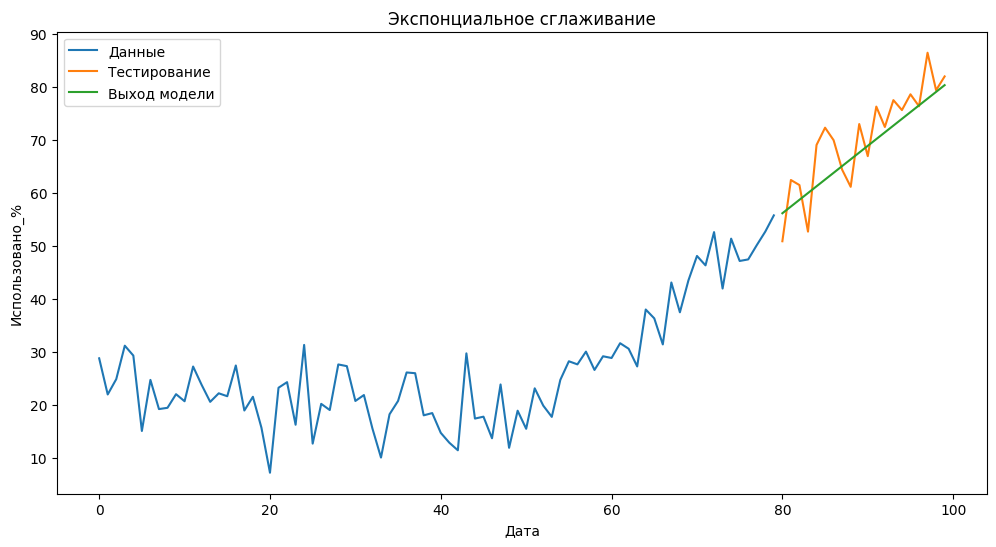

Дата, когда использование достигнет 100%: 135


In [94]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

file_path = 'hdd_usage_dataset.csv'
df = pd.read_csv(file_path)

# Подготовка данных
X = df['Дата'].values.reshape(-1, 1)
y = df['Использовано_%'].values

# Масштабируем данные
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Разделяем данные на обучающую и тестовую выборки
train_size = int(len(y_scaled) * 0.8)
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

# Строим модель
model = ExponentialSmoothing(y_train, trend='add', seasonal=None, seasonal_periods=None)
fit = model.fit()

# Делаем предсказания на тестовой выборке
y_pred = fit.forecast(steps=len(y_test))

# Обратное масштабирование предсказаний и тестовых данных к исходным масштабам
y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(df['Дата'][:train_size], scaler_y.inverse_transform(y_train.reshape(-1, 1)), label='Данные')
plt.plot(df['Дата'][train_size:], y_test_original, label='Тестирование')
plt.plot(df['Дата'][train_size:], y_pred_original, label='Выход модели')
plt.xlabel('Дата')
plt.ylabel('Использовано_%')
plt.title('Экспонциальное сглаживание')
plt.legend()
plt.show()

# Предсказание даты, когда использование достигнет 100%
future_steps = 1000  # Количество шагов в будущее для предсказания
future_predictions = fit.forecast(steps=future_steps)
future_predictions_original = scaler_y.inverse_transform(future_predictions.reshape(-1, 1)).flatten()

# Находим дату, когда предсказанное значение достигнет 100%
full_usage_index = np.where(future_predictions_original >= 100)[0]
if len(full_usage_index) > 0:
    full_usage_date = df['Дата'].max() + full_usage_index[0] + 1
else:
    full_usage_date = None

print(f'Дата, когда использование достигнет 100%: {full_usage_date}')

Результат есть, но он не радует :(

#### Пробую применить нейронные сети, хотя очевидно, что на 100 значениях результат будет не очень

In [90]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

file_path = 'hdd_usage_dataset.csv'
df = pd.read_csv(file_path)

# Подготовка данных
X = df['Дата'].values.reshape(-1, 1)
y = df['Использовано_%'].values

# Масштабируем данные
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Создаем модель
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),  # Входной слой
    tf.keras.layers.Dense(64, activation='relu'),  # Скрытый слой
    tf.keras.layers.Dense(1)  # Выходной слой
])

# Компилируем модель
model.compile(optimizer='adam', loss='mse')

# Обучаем модель
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

# Оцениваем модель на тестовых данных
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Делаем предсказания
predictions = model.predict(X_test)

# Обратное преобразование предсказаний и истинных значений к исходным масштабам
predictions = scaler_y.inverse_transform(predictions)
y_test = scaler_y.inverse_transform(y_test)

# Функция для предсказания даты, когда процент использования достигнет 100%
def predict_full_usage_date(model, scaler_X, scaler_y, current_max_date):
    future_dates = np.arange(current_max_date + 1, current_max_date + 1000).reshape(-1, 1)  # Генерируем будущие даты
    future_dates_scaled = scaler_X.transform(future_dates)  # Масштабируем будущие даты
    future_predictions = model.predict(future_dates_scaled)  # Делаем предсказания для будущих дат
    future_predictions = scaler_y.inverse_transform(future_predictions)  # Обратное масштабирование предсказаний
    full_usage_indices = np.where(future_predictions >= 100)[0]  # Находим индексы, где предсказание >= 100%
    if len(full_usage_indices) > 0:
        return future_dates[full_usage_indices[0]][0]  # Возвращаем первую дату, когда использование достигает 100%
    else:
        return None  # Если нет таких дат, возвращаем none

current_max_date = X.max()  # Текущая максимальная дата из данных
full_usage_date = predict_full_usage_date(model, scaler_X, scaler_y, current_max_date)
print(f'Predicted date when usage reaches 100%: {full_usage_date}')


Epoch 1/100
2/2 [==============================] - 3s 507ms/step - loss: 0.2204 - val_loss: 0.2294
Epoch 2/100
2/2 [==============================] - 0s 50ms/step - loss: 0.1775 - val_loss: 0.1835
Epoch 3/100
2/2 [==============================] - 0s 44ms/step - loss: 0.1370 - val_loss: 0.1447
Epoch 4/100
2/2 [==============================] - 0s 60ms/step - loss: 0.1094 - val_loss: 0.1114
Epoch 5/100
2/2 [==============================] - 0s 61ms/step - loss: 0.0822 - val_loss: 0.0851
Epoch 6/100
2/2 [==============================] - 0s 69ms/step - loss: 0.0627 - val_loss: 0.0640
Epoch 7/100
2/2 [==============================] - 0s 60ms/step - loss: 0.0478 - val_loss: 0.0480
Epoch 8/100
2/2 [==============================] - 0s 47ms/step - loss: 0.0385 - val_loss: 0.0370
Epoch 9/100
2/2 [==============================] - 0s 63ms/step - loss: 0.0332 - val_loss: 0.0302
Epoch 10/100
2/2 [==============================] - 0s 65ms/step - loss: 0.0313 - val_loss: 0.0267
Epoch 11/100
2/2 [

На удивление, она предсказала неплохой результат, относительно моделей ARIMA, SARIMA и Prophet

#### Модель ARIMA (пробный вариант)

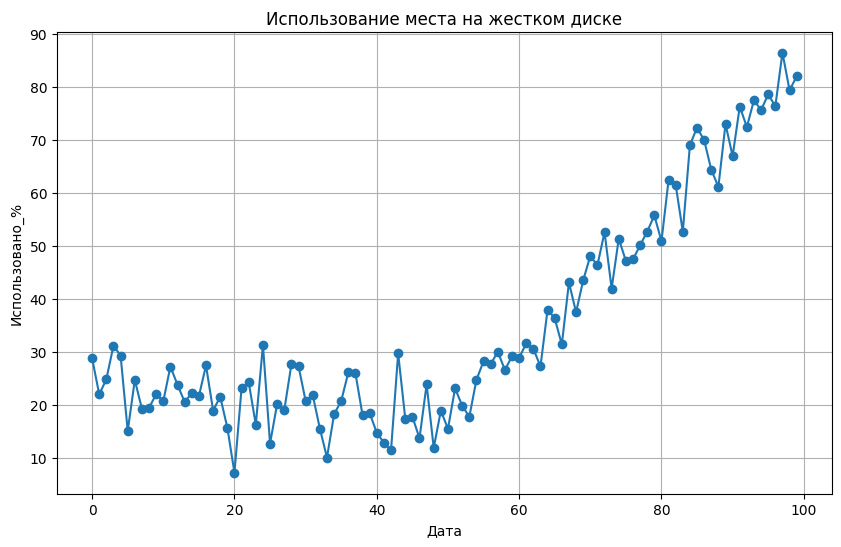

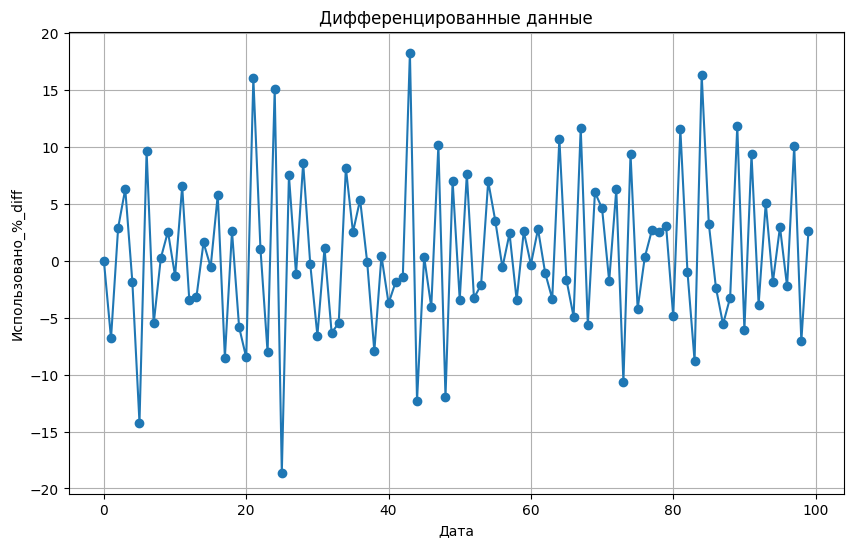

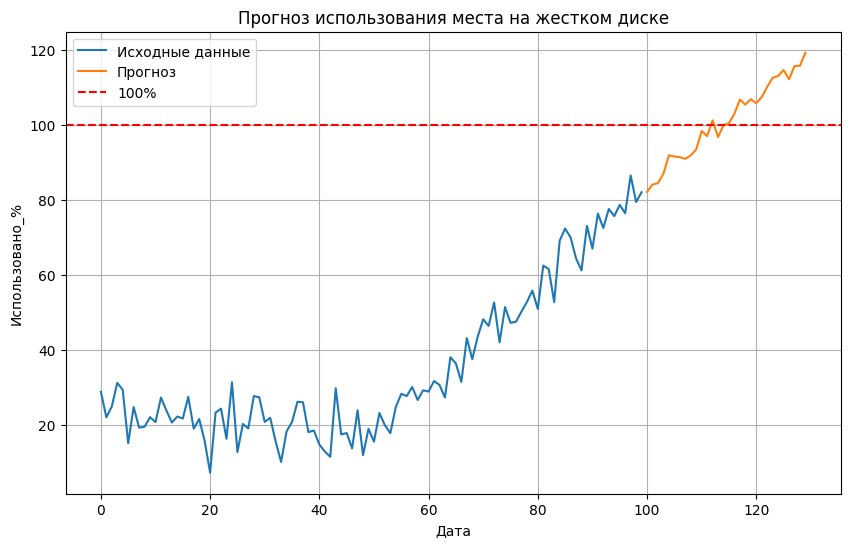

Использование диска достигнет 100% примерно к 112


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('hdd_usage_dataset.csv')

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(data['Дата'], data['Использовано_%'], marker='o')
plt.xlabel('Дата')
plt.ylabel('Использовано_%')
plt.title('Использование места на жестком диске')
plt.grid(True)
plt.show()

# Дифференцирование данных для снятия тренда
data['Использовано_%_diff'] = data['Использовано_%'].diff().fillna(0)

# ГРафик дифференцированных данных
plt.figure(figsize=(10, 6))
plt.plot(data['Дата'], data['Использовано_%_diff'], marker='o')
plt.xlabel('Дата')
plt.ylabel('Использовано_%_diff')
plt.title('Дифференцированные данные')
plt.grid(True)
plt.show()

# Определение параметров
p = 10
d = 2
q = 10

# Обучение
model = ARIMA(data['Использовано_%'], order=(p, d, q))
results = model.fit()

# Прогнозирование
forecast = results.get_forecast(steps=30)  # здесь 30 - количество временных шагов для прогнозирования
forecast_mean = forecast.predicted_mean
# Получение длины прогноза
forecast_len = len(forecast.summary_frame())

#Нахождение времени, когда использование достигнет 100%
forecast_index = forecast_mean.index
forecast_values = forecast_mean.values
time_to_full_usage = None

for idx, value in enumerate(forecast_values):
  if value >= 100:
    time_to_full_usage = forecast_index[idx]
    break

# Построение графика данных и прогноза
plt.figure(figsize=(10, 6))
plt.plot(data['Дата'], data['Использовано_%'], label='Исходные данные')
plt.plot(forecast_index, forecast_values, label='Прогноз')
plt.axhline(y=100, color='r', linestyle='--', label='100%')
plt.xlabel('Дата')
plt.ylabel('Использовано_%')
plt.title('Прогноз использования места на жестком диске')
plt.grid(True)
plt.legend()
plt.show()

if time_to_full_usage is not None:
  print(f"Использование диска достигнет 100% примерно к {time_to_full_usage}")
else:
  print("Прогноз не показывает достижения заполнения диска до 100% в указанный период прогноза.")

df = pd.DataFrame({'Values': forecast_mean.values}, index=forecast_mean.index)

В целом - звучит как претендет на победу, но надо проверить еще несколько моделей

#### ARIMA с параметрами согласно графикам автокорреляции и частичной автокорреляции

Лучшие параметры модели ARIMA: (3, 1, 3)
MSE на тестовом наборе: 416.2308604099553
Место на диске закончится к...: None


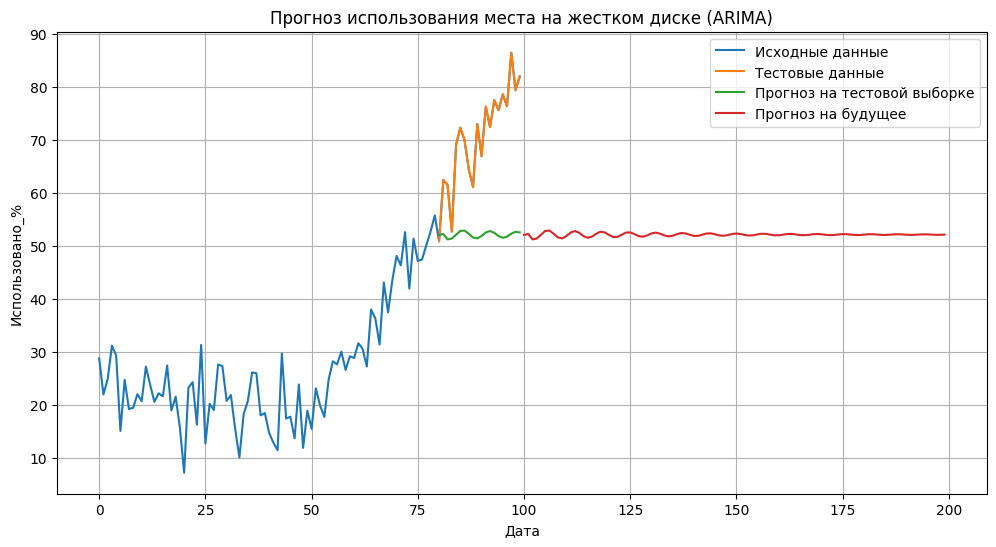

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from itertools import product
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('hdd_usage_dataset.csv')

# Масштабируем данные
scaler = MinMaxScaler()
data_scaled = data.copy()
data_scaled['Использовано_%'] = scaler.fit_transform(data[['Использовано_%']])

# Разделение данных на обучающую и тестовую выборки
train_size = int(len(data_scaled) * 0.8)
train, test = data_scaled['Использовано_%'][:train_size], data_scaled['Использовано_%'][train_size:]

# Функция для сеточного поиска параметров
def grid_search_arima(data, p_range, d_range, q_range):
    best_aic = float("inf")
    best_params = None

    # Итерация по всем комбинациям параметров
    for p, d, q in product(p_range, d_range, q_range):
        try:
            model = ARIMA(data, order=(p, d, q))
            results = model.fit()
            aic = results.aic
            # Сохранение параметров модели с наименьшим AIC
            if aic < best_aic:
                best_aic = aic
                best_params = (p, d, q)
        except:
            continue

    return best_params

# Задание диапазонов для параметров p, d и q
p_range = range(1, 10)
d_range = range(1, 2)
q_range = range(1, 5)

# Выполнение сеточного поиска на обучающей выборке
best_params = grid_search_arima(train, p_range, d_range, q_range)
print("Лучшие параметры модели ARIMA:", best_params)

# Обучение модели ARIMA с лучшими параметрами
model = ARIMA(train, order=best_params)
results = model.fit()

# Прогнозирование на тестовой выборке
forecast_test = results.get_forecast(steps=len(test))
forecast_test_mean = forecast_test.predicted_mean

# Обратное масштабирование предсказаний и тестовых данных
forecast_test_mean_original = scaler.inverse_transform(forecast_test_mean.values.reshape(-1, 1)).flatten()
test_original = scaler.inverse_transform(test.values.reshape(-1, 1)).flatten()

# Оценка качества
mse = mean_squared_error(test_original, forecast_test_mean_original)
print(f'MSE на тестовом наборе: {mse}')

# Прогнозирование на большое количество шагов в будущее
future_steps = 100
forecast_future = results.get_forecast(steps=future_steps)
forecast_future_mean = forecast_future.predicted_mean

# Обратное масштабирование предсказаний
forecast_future_mean_original = scaler.inverse_transform(forecast_future_mean.values.reshape(-1, 1)).flatten()

# Поиск даты, когда значение использования достигнет 100%
full_usage_index = np.where(forecast_future_mean_original >= 100)[0]
if len(full_usage_index) > 0:
    full_usage_date = data['Дата'].iloc[-1] + full_usage_index[0] + 1
else:
    full_usage_date = None

print(f'Место на диске закончится к...: {full_usage_date}')

# Построение графика исходных данных, тестового прогноза и будущего прогноза
plt.figure(figsize=(12, 6))
plt.plot(data['Дата'], data['Использовано_%'], label='Исходные данные')
plt.plot(data['Дата'][train_size:], test_original, label='Тестовые данные')
plt.plot(data['Дата'][train_size:], forecast_test_mean_original, label='Прогноз на тестовой выборке')
plt.plot(np.arange(len(data['Дата']), len(data['Дата']) + len(forecast_future_mean)), forecast_future_mean_original, label='Прогноз на будущее')
plt.xlabel('Дата')
plt.ylabel('Использовано_%')
plt.title('Прогноз использования места на жестком диске (ARIMA)')
plt.grid(True)
plt.legend()
plt.show()

Мда, тут результат конечно немного __неудовлетворительный__

#### ARIMA с подобранными ручным методом параметрами

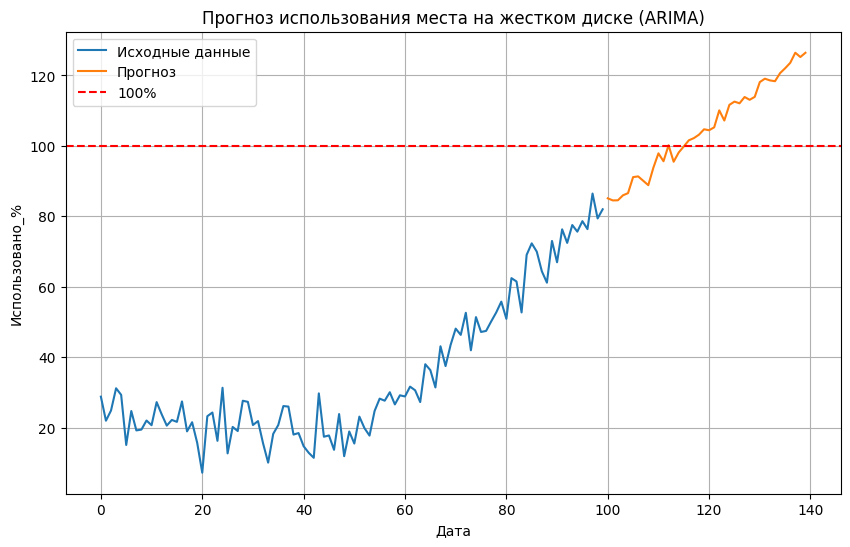

Значение 'Использовано_%' достигнет 100% примерно к 112


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv('hdd_usage_dataset.csv')

#Определение параметров модели
p = 30
d = 2
q = 2

#Обучение модели
model = ARIMA(data['Использовано_%'], order=(p, d, q))
results = model.fit()

#Прогнозирование
forecast = results.get_forecast(steps=40)  # прогноз на 30 временных шагов
forecast_mean = forecast.predicted_mean

#Нахождение временного шага, когда использование достигнет 100%
forecast_index = forecast_mean.index
forecast_values = forecast_mean.values
time_to_full_usage = None

for idx, value in enumerate(forecast_values):
  if value >= 100:
    time_to_full_usage = forecast_index[idx]
    break

# Построение графика исходных данных и прогноза
plt.figure(figsize=(10, 6))
plt.plot(data['Дата'], data['Использовано_%'], label='Исходные данные')
plt.plot(forecast_index, forecast_values, label='Прогноз')
plt.axhline(y=100, color='r', linestyle='--', label='100%')
plt.xlabel('Дата')
plt.ylabel('Использовано_%')
plt.title('Прогноз использования места на жестком диске (ARIMA)')
plt.grid(True)
plt.legend()
plt.show()

if time_to_full_usage is not None:
  print(f"Значение 'Использовано_%' достигнет 100% примерно к {time_to_full_usage}")
else:
  print("Прогноз не показывает достижения значения 'Использовано_%' до 100% в указанный период прогноза.")

#### SARIMA модель с случайными параметрами и графиком диффиренцирования

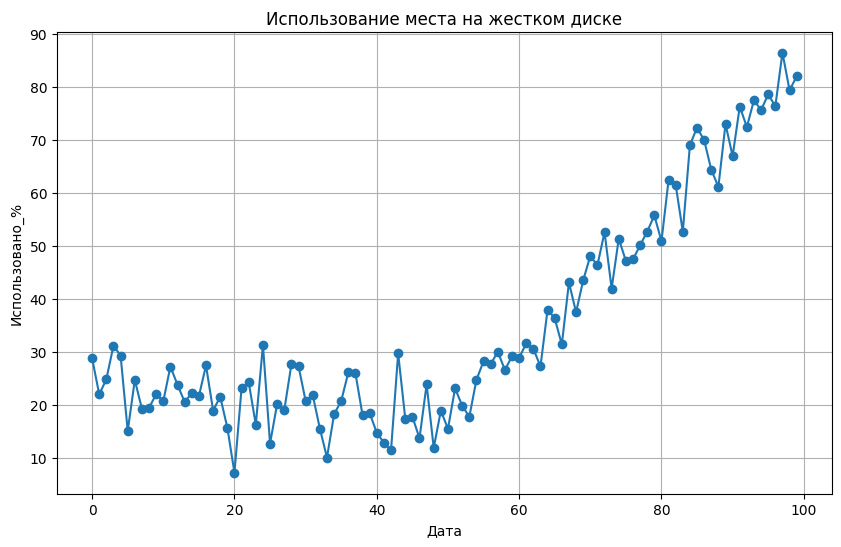

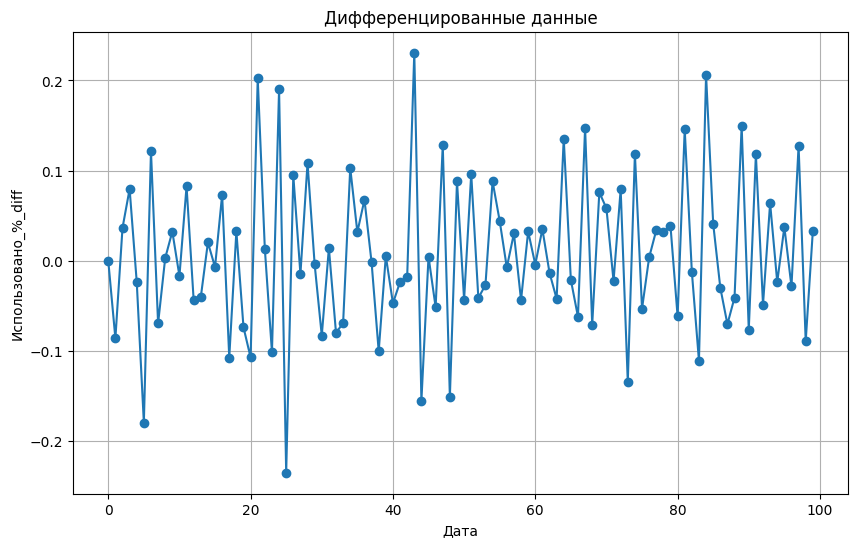

MSE на тестовом наборе: 93.58548740632807


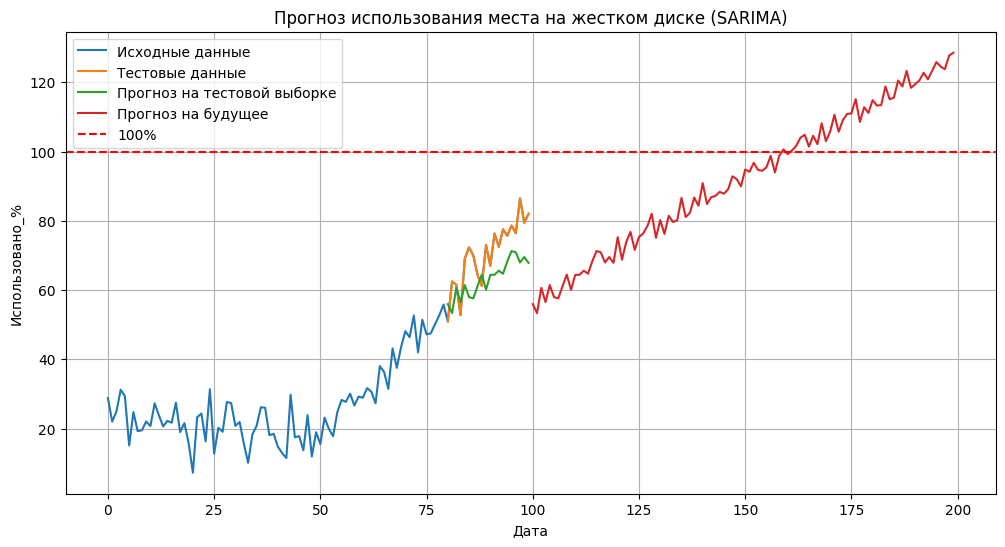

Использование диска достигнет 100% примерно к 159


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('hdd_usage_dataset.csv')

# Масштабируем данные
scaler = MinMaxScaler()
data_scaled = data.copy()
data_scaled['Использовано_%'] = scaler.fit_transform(data[['Использовано_%']])

# Разделение данных на обучающую и тестовую выборки
train_size = int(len(data_scaled) * 0.8)
train, test = data_scaled['Использовано_%'][:train_size], data_scaled['Использовано_%'][train_size:]

# Построение графика исходных данных
plt.figure(figsize=(10, 6))
plt.plot(data['Дата'], data['Использовано_%'], marker='o')
plt.xlabel('Дата')
plt.ylabel('Использовано_%')
plt.title('Использование места на жестком диске')
plt.grid(True)
plt.show()

# Дифференцирование данных для снятия тренда
data_scaled['Использовано_%_diff'] = data_scaled['Использовано_%'].diff().fillna(0)

# Построение графика дифференцированных данных
plt.figure(figsize=(10, 6))
plt.plot(data['Дата'], data_scaled['Использовано_%_diff'], marker='o')
plt.xlabel('Дата')
plt.ylabel('Использовано_%_diff')
plt.title('Дифференцированные данные')
plt.grid(True)
plt.show()

# Определение параметров модели
p = 10
d = 1
q = 10
P = 1
D = 1
Q = 1
s = 12 # 12 месяцев конечно странно, но это лишь эксперимент

# Обучение модели
model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# Прогнозирование на тестовой выборке
forecast_test = results.get_forecast(steps=len(test))
forecast_test_mean = forecast_test.predicted_mean

# Обратное масштабирование предсказаний и тестовых данных
forecast_test_mean_original = scaler.inverse_transform(forecast_test_mean.values.reshape(-1, 1)).flatten()
test_original = scaler.inverse_transform(test.values.reshape(-1, 1)).flatten()

# Оценка качества модели на тестовом наборе
mse = mean_squared_error(test_original, forecast_test_mean_original)
print(f'MSE на тестовом наборе: {mse}')

# Прогнозирование на следующие 30 шагов
forecast_future = results.get_forecast(steps=100)
forecast_future_mean = forecast_future.predicted_mean

# Обратное масштабирование предсказаний
forecast_future_mean_original = scaler.inverse_transform(forecast_future_mean.values.reshape(-1, 1)).flatten()

# Получение индексов прогноза
forecast_index = np.arange(len(data['Дата']), len(data['Дата']) + len(forecast_future_mean))

# Нахождение времени, когда использование достигнет 100%
time_to_full_usage = None

for idx, value in enumerate(forecast_future_mean_original):
    if value >= 100:
        time_to_full_usage = forecast_index[idx]
        break

# Построение графиков
plt.figure(figsize=(12, 6))
plt.plot(data['Дата'], data['Использовано_%'], label='Исходные данные')
plt.plot(data['Дата'][train_size:], test_original, label='Тестовые данные')
plt.plot(data['Дата'][train_size:], forecast_test_mean_original, label='Прогноз на тестовой выборке')
plt.plot(forecast_index, forecast_future_mean_original, label='Прогноз на будущее')
plt.axhline(y=100, color='r', linestyle='--', label='100%')
plt.xlabel('Дата')
plt.ylabel('Использовано_%')
plt.title('Прогноз использования места на жестком диске (SARIMA)')
plt.grid(True)
plt.legend()
plt.show()

if time_to_full_usage is not None:
    print(f"Использование диска достигнет 100% примерно к {time_to_full_usage}")
else:
    print("Прогноз не показывает достижения использования 100% в период прогноза.")

Тут результат __не воодушевляет__

#### Применение Prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsc1zovub/3hua7zdp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsc1zovub/7euyvyfr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21727', 'data', 'file=/tmp/tmpsc1zovub/3hua7zdp.json', 'init=/tmp/tmpsc1zovub/7euyvyfr.json', 'output', 'file=/tmp/tmpsc1zovub/prophet_model0vjqa6rh/prophet_model-20240519082620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:26:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:26:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


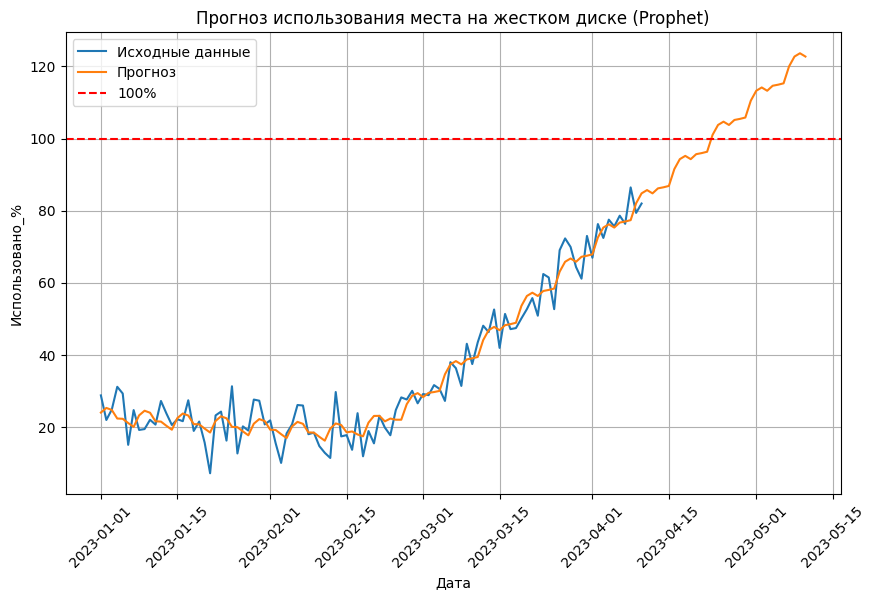

Исполльзование диска достигнет 100% примерно к 23.04.2023
Это произойдет через 13 дней с момента последнего измерения
Последний день в данных по новому исчислению: 10.04.2023


In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('hdd_usage_dataset.csv')

# Преобразование номеров дней в даты (требуетс для работы модели)
data['Дата'] = pd.to_datetime(data['Дата'], unit='D', origin='2023-01-01')

# Преобразование формата даты в "дд.мм.гггг"
data['Дата'] = data['Дата'].dt.strftime('%d.%m.%Y')

# Преобразование данных для модели
data_prophet = data[['Дата', 'Использовано_%']]
data_prophet.columns = ['ds', 'y']
data_prophet['ds'] = pd.to_datetime(data_prophet['ds'], format='%d.%m.%Y')

# Создание и обучение модели
model_prophet = Prophet()
model_prophet.fit(data_prophet)

# Прогнозирование
future = model_prophet.make_future_dataframe(periods=30)
forecast = model_prophet.predict(future)

# Нахождение временного шага, когда использование достигнет 100%
time_to_full_usage = forecast[forecast['yhat'] >= 100].head(1)['ds']

# Определение последнего дня в данных
last_day = data_prophet['ds'].max()

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(data_prophet['ds'], data_prophet['y'], label='Исходные данные')
plt.plot(forecast['ds'], forecast['yhat'], label='Прогноз')
plt.axhline(y=100, color='r', linestyle='--', label='100%')
plt.xlabel('Дата')
plt.ylabel('Использовано_%')
plt.title('Прогноз использования места на жестком диске (Prophet)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

if not time_to_full_usage.empty:
    full_usage_date = pd.to_datetime(time_to_full_usage.values[0])
    days_until_full = (full_usage_date - last_day).days
    print(f"Исполльзование диска достигнет 100% примерно к {full_usage_date.strftime('%d.%m.%Y')}")
    print(f"Это произойдет через {days_until_full} дней с момента последнего измерения")
else:
    print("Прогноз не показывает заполнения диска в указанный период прогноза")

print(f"Последний день в данных по новому исчислению: {last_day.strftime('%d.%m.%Y')}")

В целом - достойный результат, очень даже похвально с учетом того, что модель также учитывает сезонность

### Вывод

С учетом того, что использование места на диске - очень индивидуальная вещь, мы можем оценивать лишь приблизительную дату, когда место закончится. Тем не менее, по моему мнению (ибо я не везде использовал методы оценки моделей) наиболее точные резльутаты показали модели ARIMA и Prophet, таким образом, место на диске, при очень неаккуратном использовании закончится через 12-13 дней, но если использовать его бережно, то можно растянуть этот период от 28 до 35 дней.